In [1]:
#EDA (Exploratory data analysis)

In [2]:
import pandas as pd

In [3]:
import ipywidgets as widgets

In [4]:
from pysentimiento.preprocessing import preprocess_tweet

In [5]:
#Helper Functions

In [6]:
# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"

In [7]:
#Read Data

In [8]:
# merging two csv files 
df = pd.concat( 
    map(pd.read_csv, ['data/raw_dataset-01.csv', 'data/raw_dataset-02.csv', 'data/raw_dataset-03.csv', 'data/raw_dataset-04.csv']), ignore_index=True) 
# print(df) 

# df = pd.read_csv(r'data/raw_dataset-01.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10961 entries, 0 to 10960
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10961 non-null  object
 1   label   10961 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 171.4+ KB


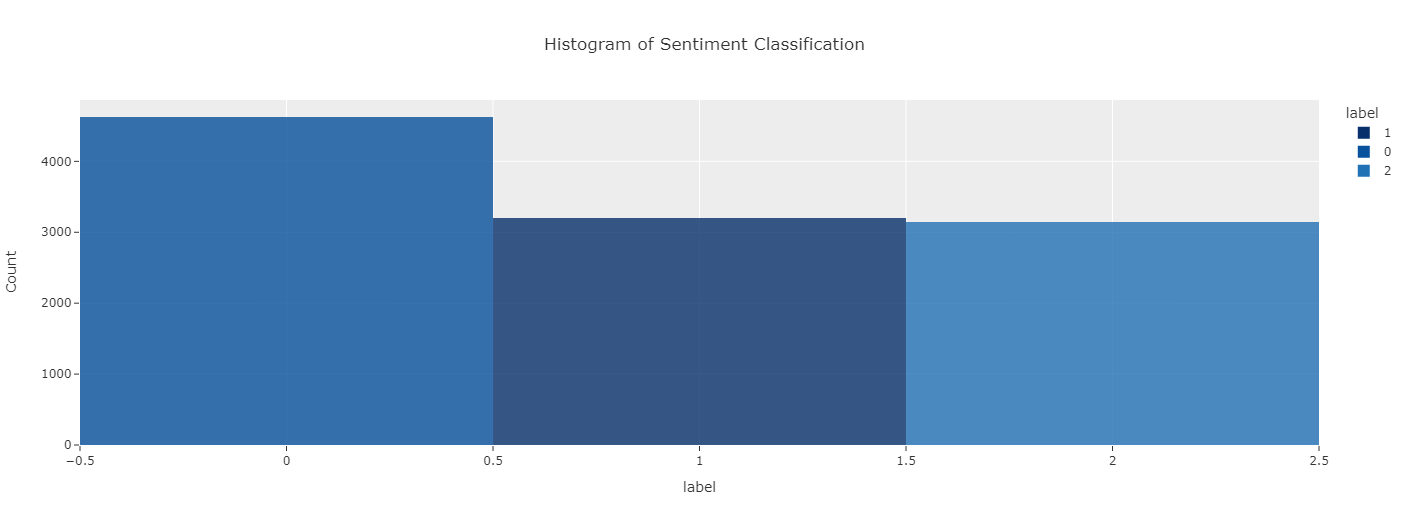

In [9]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

# count of ratings
fig = px.histogram(df,
             x = 'label',
             title = 'Histogram of Sentiment Classification',
             template = 'ggplot2',
             color = 'label',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [10]:
# encode label and mapping label name
#df["label"] = df["label"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label2name(x))

In [11]:
# clean text, lowercase and remove punk
df["text"] = df["text"].apply(lambda x: preprocess_tweet(x, demoji=False))

In [12]:
df.head()

text  label label_name
0    Oe Chacal      1    Neutral
1    Anda vete      0   Negative
2   a la firme      1    Neutral
3   Chau, cojo      0   Negative
4  Tengo plata      1    Neutral

In [13]:
df.sample(n = 30)

text  label label_name
6908   Algún grone para ver el partido en mi cuarto ?...      0   Negative
5748   Claudita es la gringa que dice amor quiero beb...      1    Neutral
3061   JAJAJAJA más risa me dio que el policía lo ten...      0   Negative
7269                                Y más vagooo !!! 🤣🤣🤣      0   Negative
9952   La chata ya se olvidó de andar en tacos, Dany ...      2   Positive
8623   Esto me recuerda, que tenia una novia y se lla...      1    Neutral
10825                       Rafael Medina R. tu ñora 🤣🤣🤣      0   Negative
4278            César Caro Amooor jaja eres la flaca ️️️      1    Neutral
4023   Tmr.. Mi sueño. Es ser. Un nini. Pero con plat...      0   Negative
4068   Diego Sanchez tu causa Peter Moran que no perd...      0   Negative
1715   Si comer rico quieres, venir al norte debes! J...      2   Positive
5405   Nadita de envidia haaa !!! 🤭🤭... Éxitos compar...      2   Positive
1022                    Un brindis por mi causa Caradura      2   Positive
2099   Estoy muy feliz de cómo Dios ha transformado m...      1    Neutral
10186  Tiene razón Abugatas, nos guste o no, ya verán...      0   Negative
8184   No soy experta en música, pero, susan canto bi...      1    Neutral
7320   Buena Loco, lo trapeaste en su propio programa 👍.      2   Positive
1139   Oscar que sabes de la U  jales posibles refuerzos      1    Neutral
7112   Que sano eres Henry .cómo que te falta explora...      1    Neutral
7607   Pobre Leyla Chihuan , podrá sobrevivir con el ...      1    Neutral
5590   Le falta comer la ping..🥒  rellena!!! De la tí...      0   Negative
8982                          Andrea para la gorditaaa 😍      2   Positive
3551                 Quítenle el micro a este payaso 🤡 😒      0   Negative
4836                              Ya tengo la canchita 😷      2   Positive
8610   Howard Anthony Mata Vara... Uyyy la bichotaaa!...      0   Negative
7354   Camila Clarisse por si no lo conoces este es o...      2   Positive
4552   Yoel Vasquez Gutierrez Pachin RV  Jimmy Jesus ...      1    Neutral
1723   Siendo francos soy presidente y no le voy hace...      1    Neutral
9247   Me encanta tus videos y tú manera de ser. Me f...      2   Positive
2097   Hablan y hablan y ningun equipo Peruano gana n...      0   Negative

In [14]:
#Visualizations

In [15]:
#Word Cloud

In [16]:
from wordcloud import WordCloud


In [17]:

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [18]:

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords = set(stopwords.words('spanish', 'english'))
stopwords.update([ "x", "xq","q","Jajajaa","perra","kieren","verga","inés"])
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords = stopwords,
        max_words=200,
        max_font_size=40, 
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JairL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


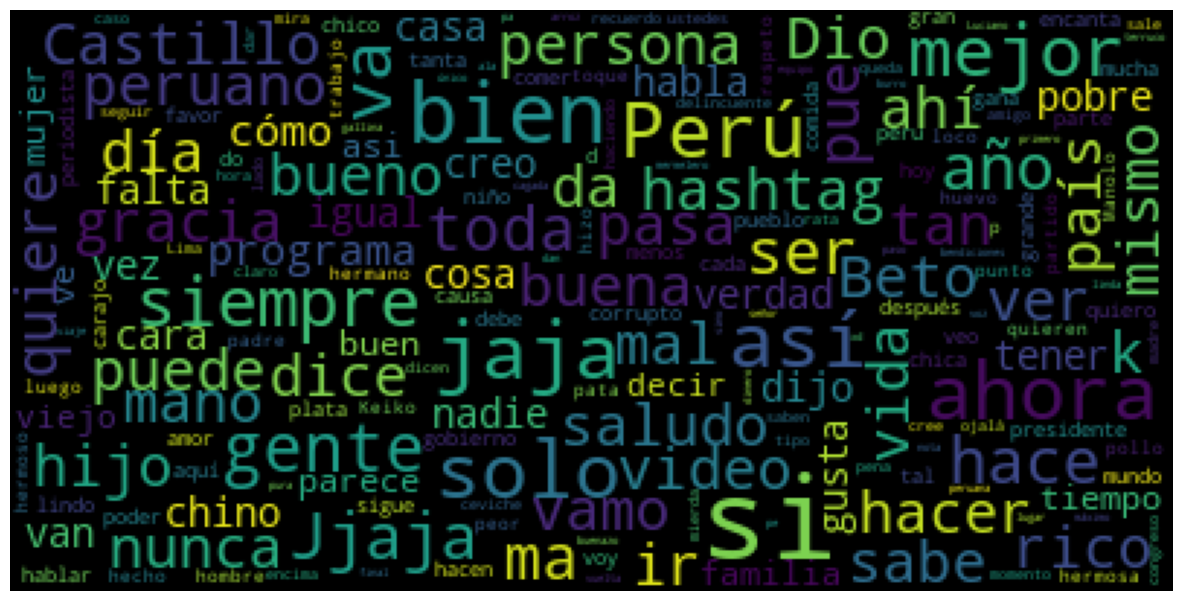

In [19]:
show_wordcloud(df["text"].values)

In [20]:
#Target Count

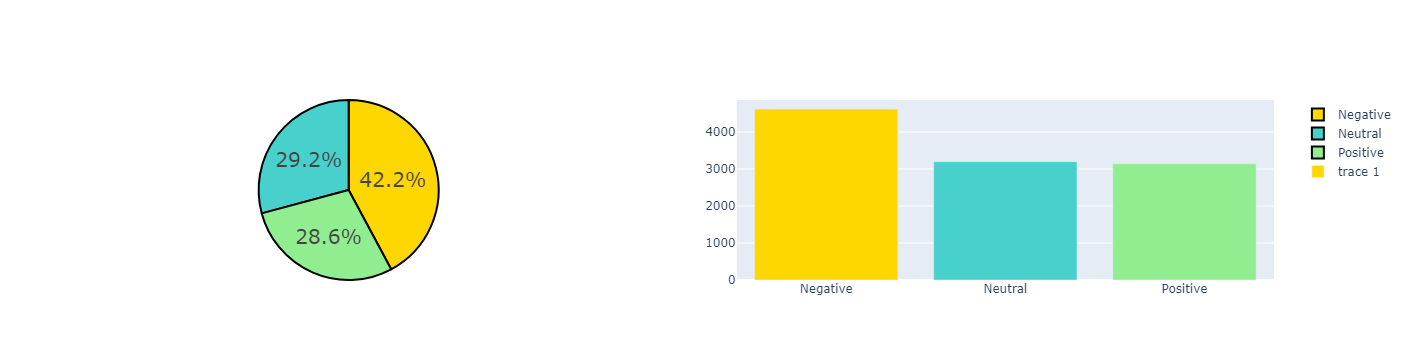

In [21]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['gold', 'mediumturquoise', 'lightgreen'] # darkorange
fig.add_trace(go.Pie(labels=df.label_name.value_counts().index,
                             values=df.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=df.label_name.value_counts().index, y=df.label.value_counts().values, marker_color = colors), 1,2)

fig.show()

In [22]:
#Token Counts with simple tokenizer¶


In [23]:
# tokenize data
#df["tokenized_text"] = df.text.apply(lambda x: tokenize(x))
df["tokenized_text"] = df.text.apply(lambda x: preprocess_tweet(x, demoji=False))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_text"].apply(lambda x: len(x.split()))

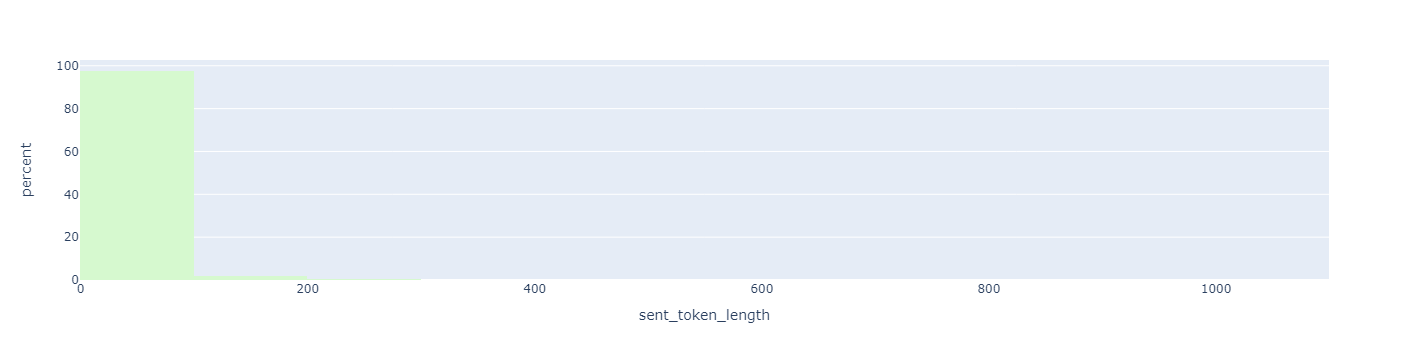

In [24]:
fig = px.histogram(df, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [25]:
(df.sent_token_length < 200).mean()

0.9929750935133655

In [26]:
#Token Counts with roBERTuito tokenizer

In [27]:
from transformers import AutoTokenizer
model_name = "pysentimiento/robertuito-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [28]:
# data tokenize with bert tokenizer
df["sent_bert_token_length"] = df["text"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))

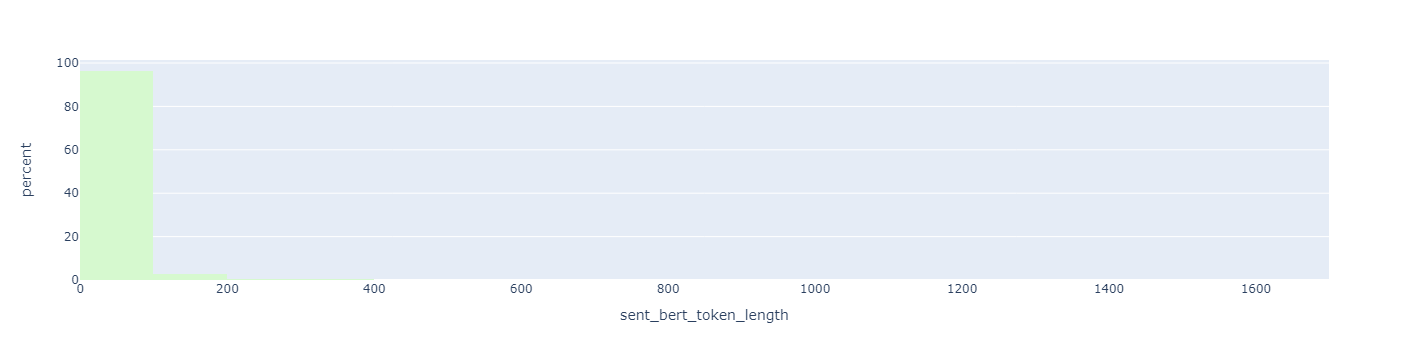

In [29]:
fig = px.histogram(df, x="sent_bert_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [30]:
# Less than 512 covers how many of the data
(df.sent_bert_token_length < 200).mean()

0.9906030471672292

In [31]:
#Characters Count in the Data

In [32]:

# valvulate char count for each review
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

import seaborn as sns
def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



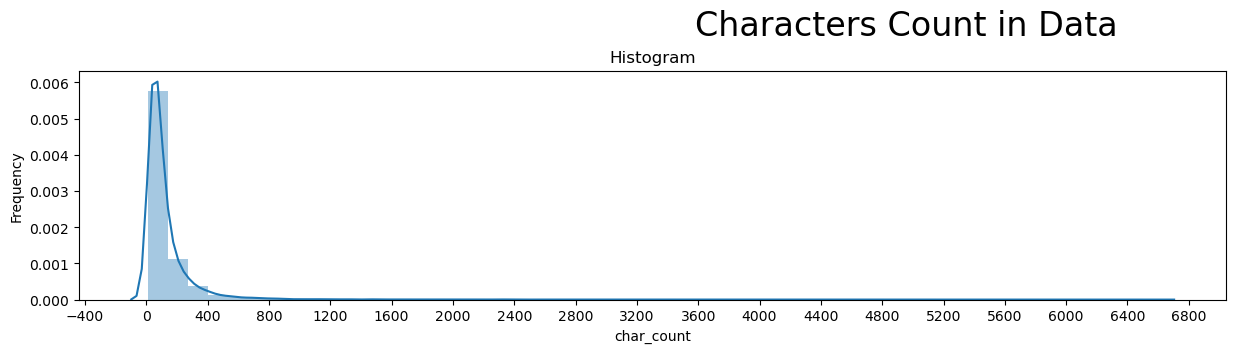

In [33]:
plot_dist3(df, 'char_count',
           'Characters Count in Data')

In [34]:
#Reviews Lengths

In [35]:
# Creating a new feature for the visualization.
df['Character Count'] = df['text'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    plt.suptitle(f'{title}', fontsize=24)

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



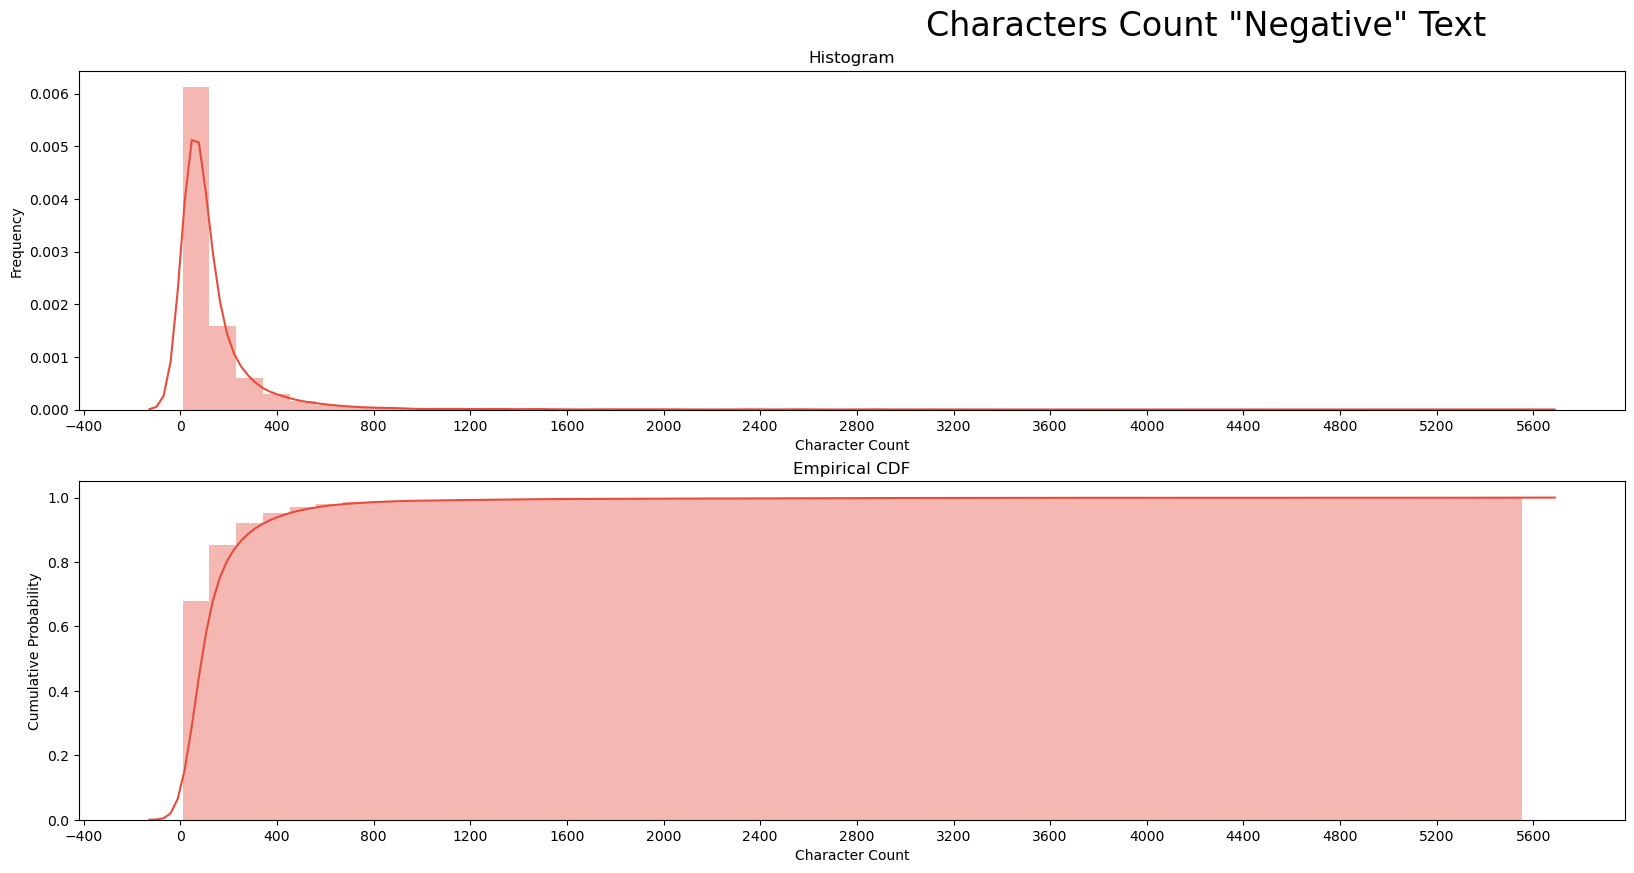

In [36]:
plot_dist3(df[df['label'] == 0], 'Character Count',
           'Characters Count "Negative" Text')

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



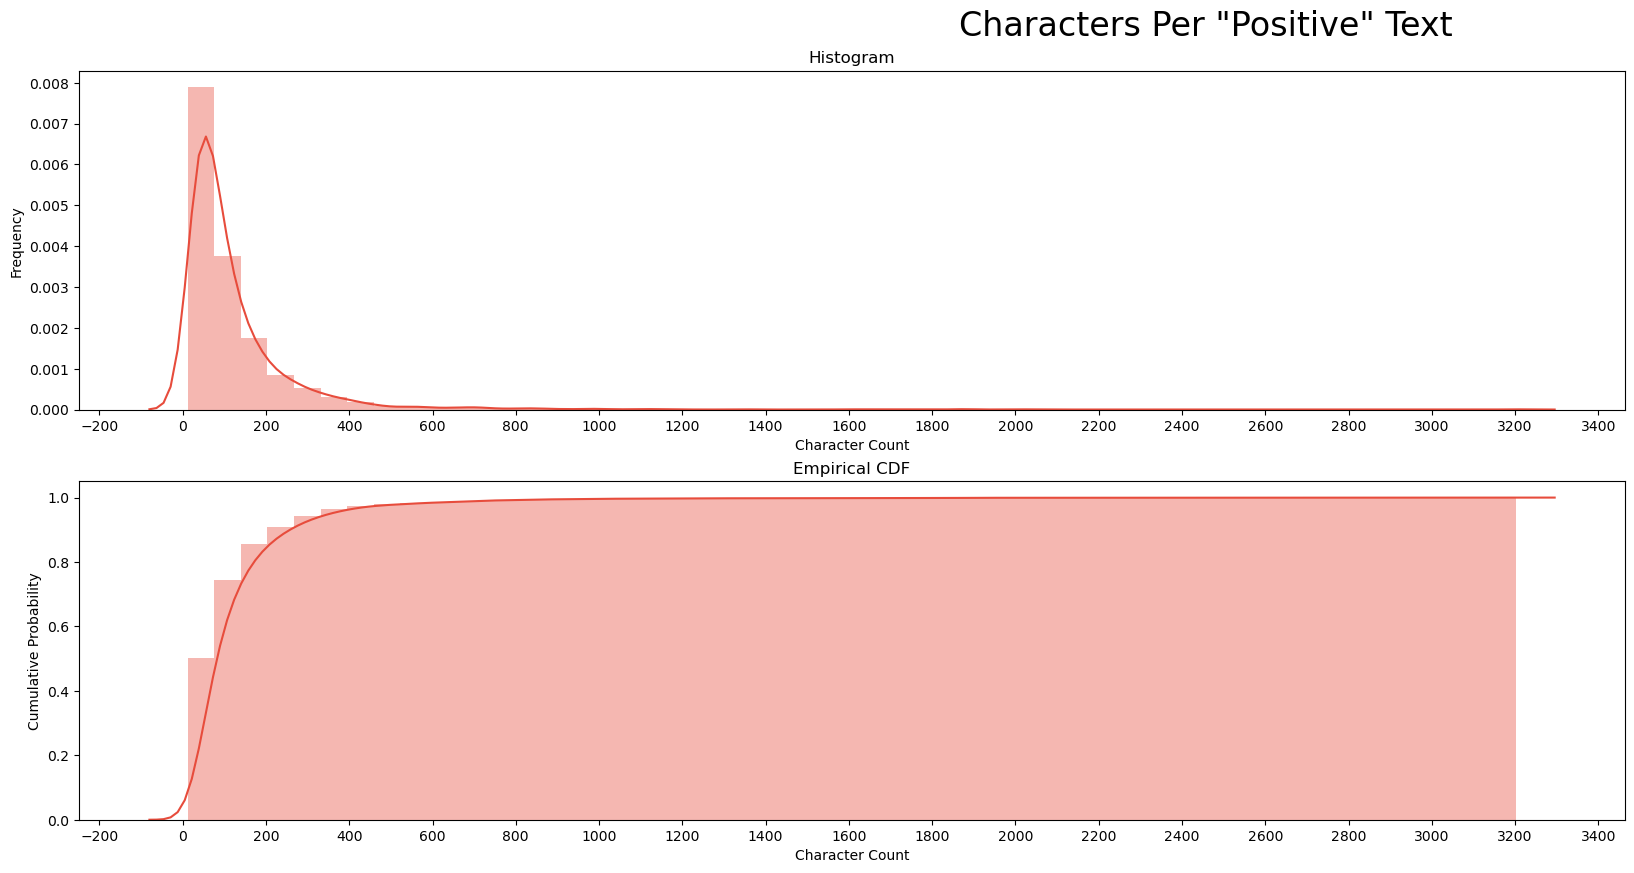

In [37]:
plot_dist3(df[df['label'] == 2], 'Character Count',
           'Characters Per "Positive" Text')

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



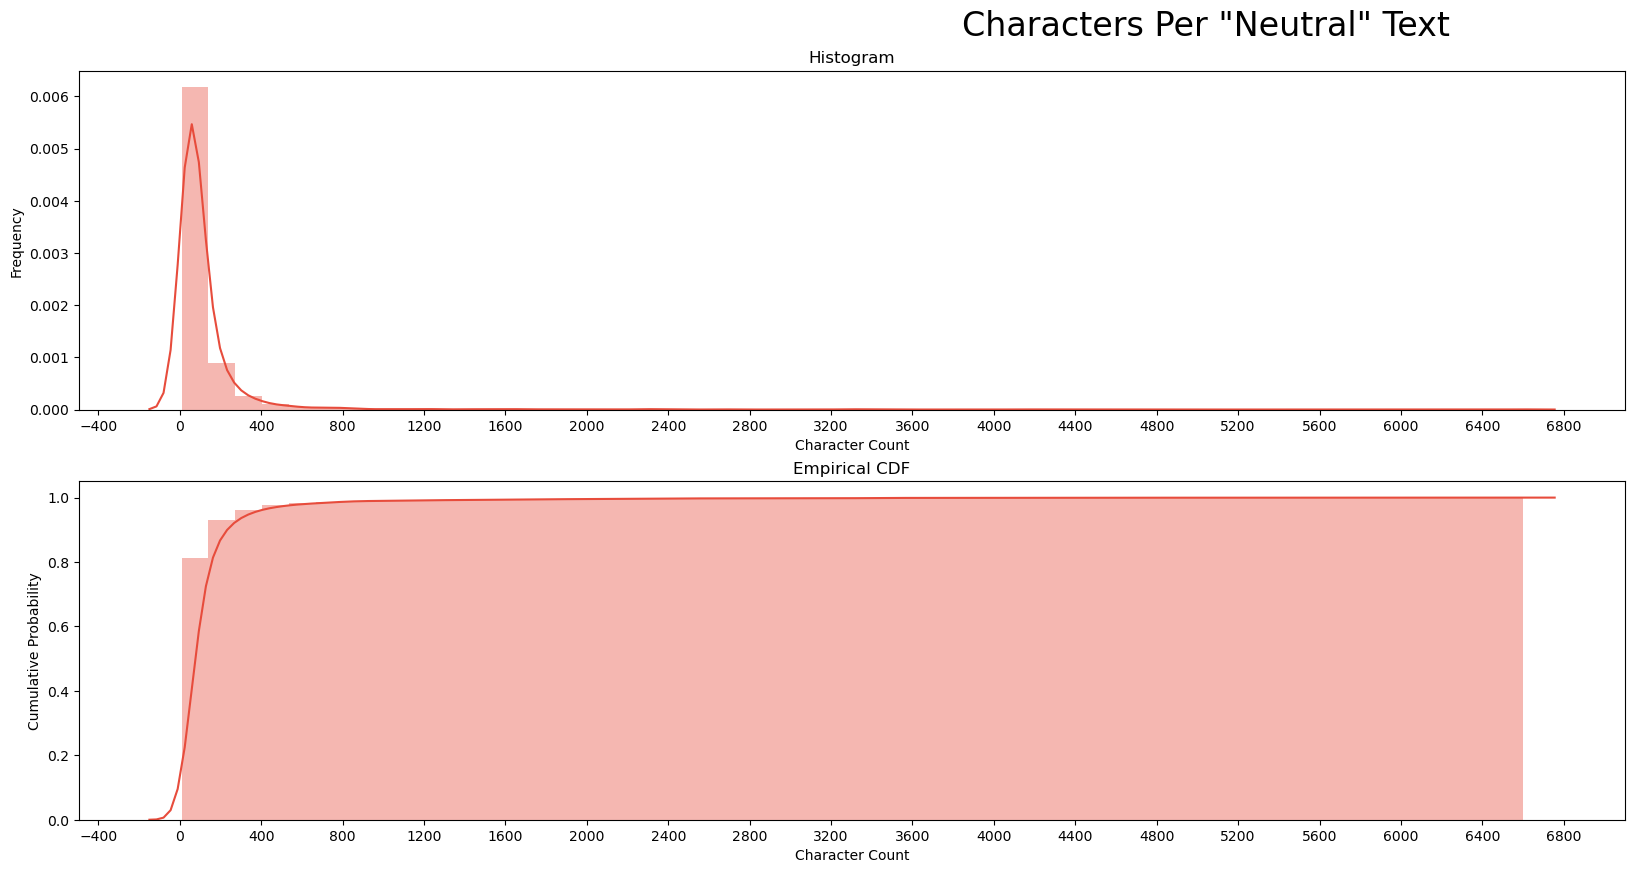

In [38]:
plot_dist3(df[df['label'] == 1], 'Character Count',
           'Characters Per "Neutral" Text')

In [39]:
#Word Counts

In [40]:
def plot_word_number_histogram(textno, textye, textz):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(18, 12), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    sns.distplot(textz.str.split().map(lambda x: len(x)), ax=axes[2], color='#e74c3c')

    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('negative')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('netrual')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('pozitive')
    
    fig.suptitle('Words Per Review', fontsize=24, va='baseline')
    
    fig.tight_layout()

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



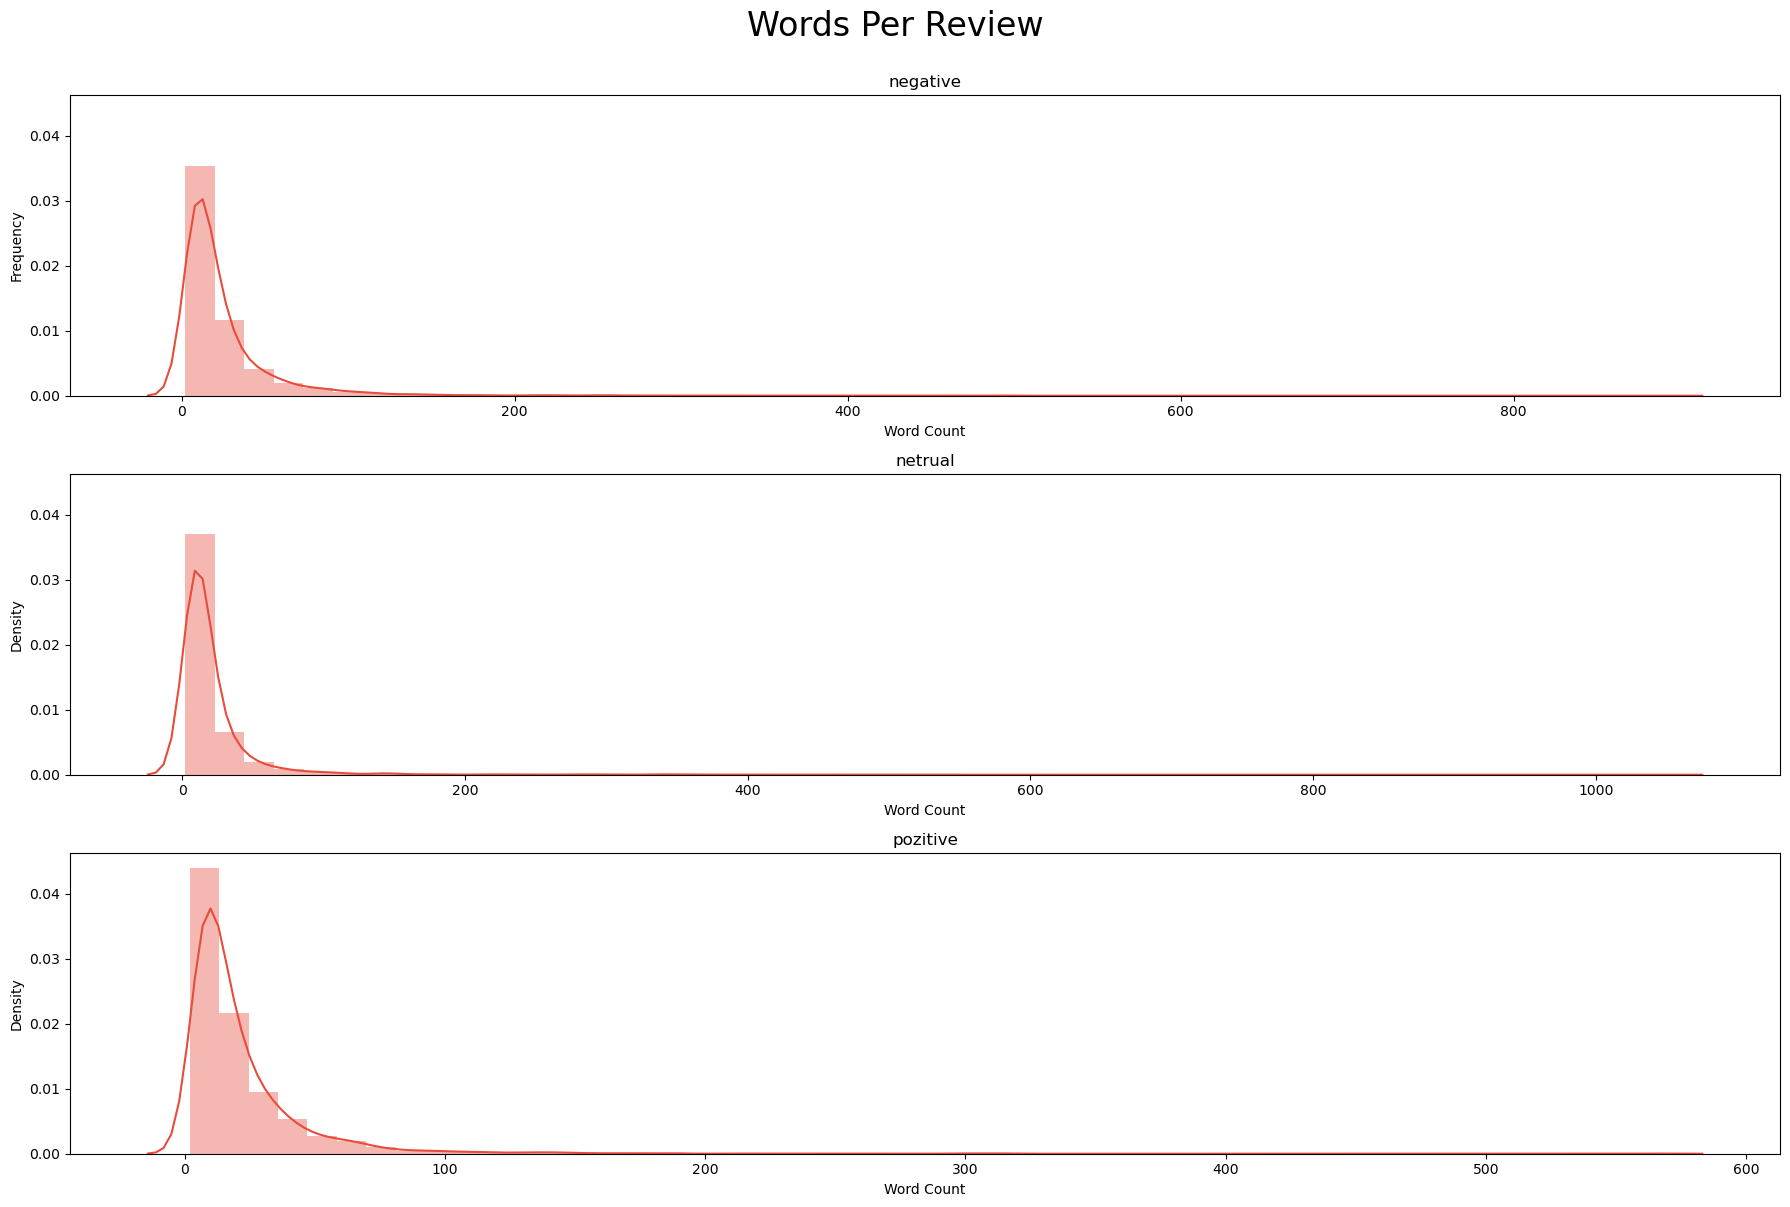

In [41]:
plot_word_number_histogram(df[df['label'] == 0]['text'],
                           df[df['label'] == 1]['text'],
                           df[df['label'] == 2]['text'],
                          )

In [42]:
# remove punk 
#df['tokenized_text'] = df['tokenized_text'].apply(lambda x: remove_punct(x))

In [43]:
df['tokenized_text'][:50]

0          Oe Chacal
1          Anda vete
2         a la firme
3         Chau, cojo
4        Tengo plata
5        Así no vale
6        tas huevón
7        Tanta finta
8       no jodas pe
9       estaba aguja
10      es la cagada
11      bien chévere
12     No seas cabro
13     ahorita acabo
14     Ahorita vengo
15     Estoy a punto
16     Ahorita salgo
17     Ahorita vengo
18     ahorita llega
19     Estás fregado
20     Parecías loco
21     tanta huevada
22     -Eres un vivo
23     Dale U carajo
24     eres mi causa
25     tanta huevada
26     Fui un huevón
27     es un chibolo
28     Es un maricón
29     Te ha fregado
30     Enano cabrón
31     tanta huevada
32    Vengan ahorita
33    Vuelvo ahorita
34    Ya la quemaron
35    habla Misterio
36    Mi viejo lloró
37    Vamos al toque
38    Anda a tu casa
39    Anda vete, sal
40    Vamos al toque
41    Sigue mechando
42    Desde chiquita
43    estoy voladazo
44    El pobre negro
45    No tengo plata
46    Era un chancón
47    No tení

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JairL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


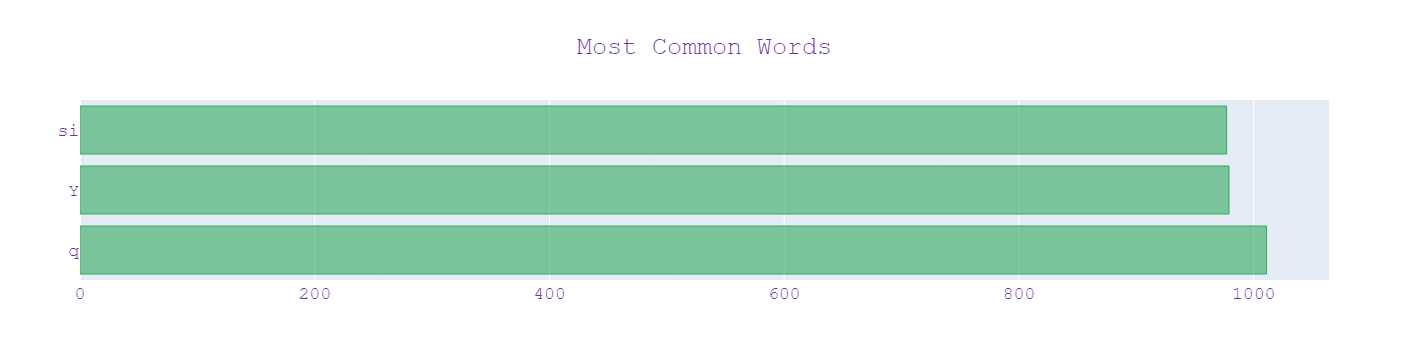

In [44]:
from collections import Counter, defaultdict

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('spanish'))

texts = df['tokenized_text']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()

In [45]:
#Most Common ngrams

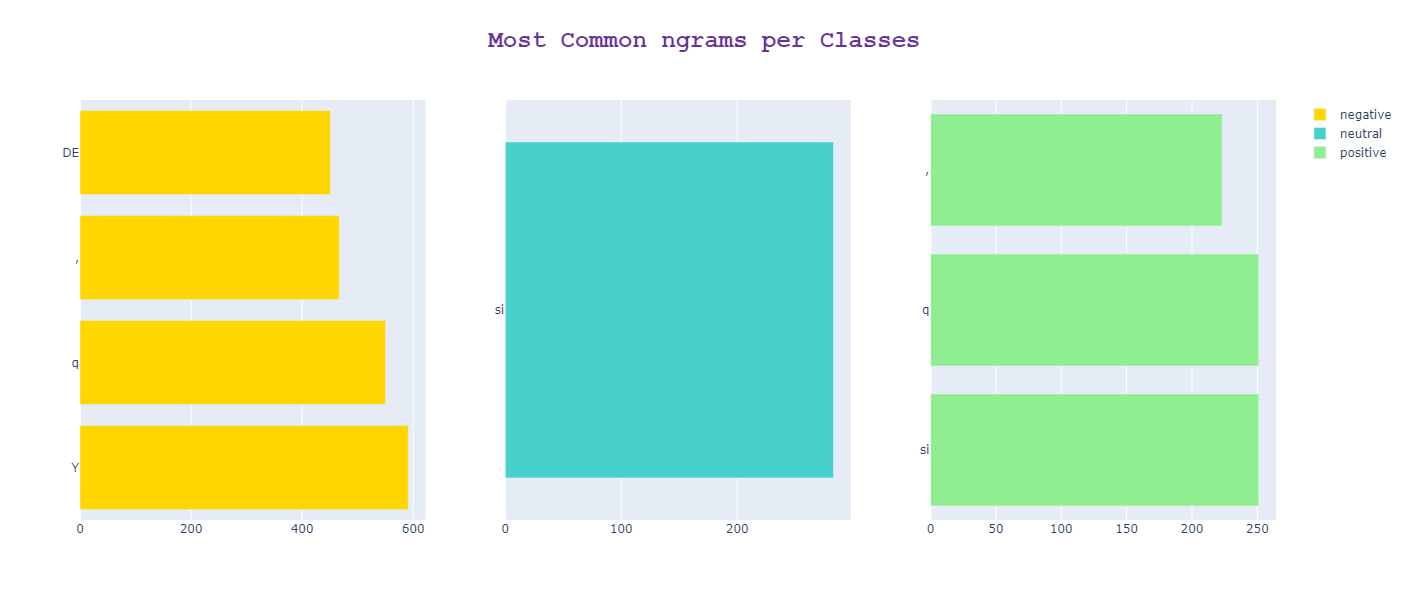

In [46]:
fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    
fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ),)


fig.show()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

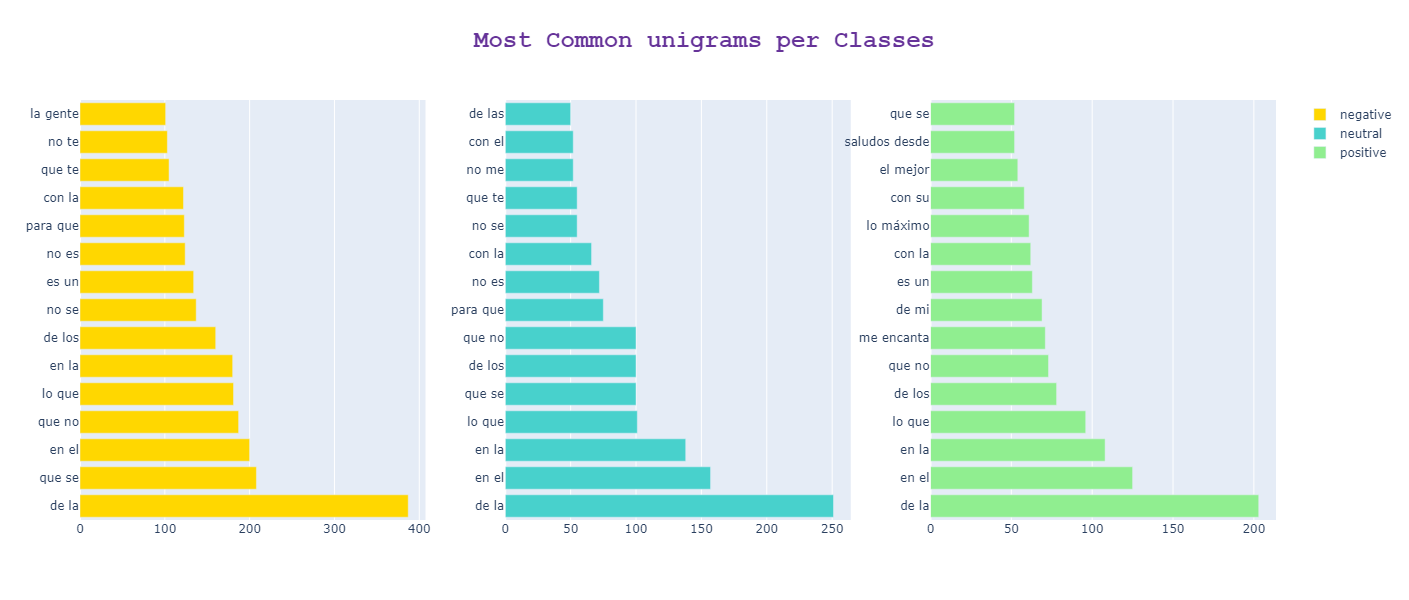

In [48]:
# unigram
fig = make_subplots(rows=1, cols=3)

title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common unigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))      
fig.show()

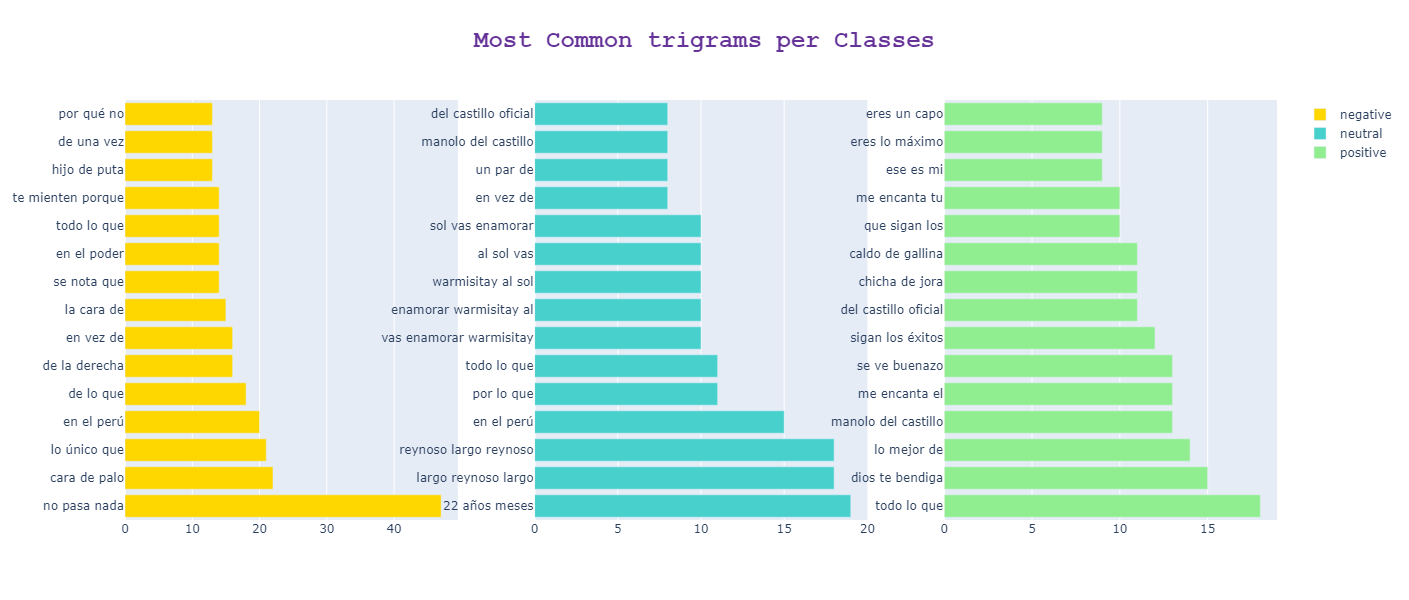

In [49]:
#trigram

fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
    
fig.show()

In [50]:
#split train test
from sklearn.model_selection import train_test_split


random_state=1
train_df_, val_df = train_test_split(df, 
                                    test_size=0.10, 
                                    random_state=random_state, 
                            stratify=df.label.values)

In [51]:

train_df, test_df = train_test_split(train_df_, 
                                    test_size=0.10, 
                                    random_state=42, 
                            stratify=train_df_.label.values)

In [52]:
train_df.to_csv('data/train.csv', index=False)
val_df.to_csv('data/val.csv', index=False)
test_df.to_csv('data/test.csv', index=False)

In [53]:
!ls -l

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [54]:
len(train_df)

8877

In [55]:
len(test_df)

987

In [56]:
len(val_df)

1097

In [57]:
df.sample(n = 30)

text  label label_name  \
272                          Sácamelo, carajo gritó él      0   Negative   
10052  Gissella Rodriguez Arimuya Maximo Velazco Domi...      2   Positive   
1312                          Gabriel Chaupis Garcia 🤣🤣🤣      1    Neutral   
2209   Q rico son las comidas de Arequipa ️️ a mi ciu...      2   Positive   
6489   Más de 20mil reproducciones de la misma gente ...      1    Neutral   
2684   Porque habla de que correrá MUCHA SANGRE acaso...      0   Negative   
4949                   los brownies son buenazos ahi!!👍👍      2   Positive   
5130                     Omg me encantan sus canguros 🤞🍀      2   Positive   
2463   Yala, pero el mejor chicharrón del Perú está e...      2   Positive   
9444   Las personas son in orange tomándose fotos com...      0   Negative   
3637           Escucharlos hablar nomas te dan asco. 🤮🤮🤮      0   Negative   
2318   Asu qué paja! Tantas veces en Huaraz y jamás s...      2   Positive   
8944   Mi abuelita hacía así la ocopa y la papa a la ...      2   Positive   
960    Nunca había tenido ganas de acostarme con un c...      1    Neutral   
6575   Eres una Trome ,pero me hiciste recordar mi pa...      2   Positive   
9313   Se me a parado la chulapi  Ciego .. que ricooo...      2   Positive   
4981   El Cántaro en Lambayeque , buenazo... 100% del...      2   Positive   
9632   Ese coronel es una joyita, blindando por la ma...      0   Negative   
670       Porfirio Medrano cargaba su viejo rifle Pívode      1    Neutral   
2556   Los violadores, dilencuentes y otros mafiosos ...      0   Negative   
7899   Esto es para sacarse el sombrero es admirable....      2   Positive   
9760   Ya era hora Beto Ortiz (Oficial) 👏👏👏 .. ahora ...      2   Positive   
7585    Ya está el chancay falta la gaseosa  nomas.👐🤭🤭😂😂      1    Neutral   
16                                         Ahorita salgo      1    Neutral   
6380                        sin roche yo he comido ahy 😁      1    Neutral   
3279   Tmr seré tu hincha y todo pero que digas evita...      0   Negative   
5468   Lizet Medina Llanto para el 2020 vamos pero a ...      1    Neutral   
10142  Y como no disen nada de ése maldito de fujimor...      0   Negative   
5258   Maledeeeto como provocas😭😭😭 ahhh quiero mi cho...      2   Positive   
3559               Cual es firme y cuál es la trampa 🤔🤔🤔      0   Negative   

                                          tokenized_text  sent_token_length  \
272                          Sácamelo, carajo gritó él                  4   
10052  Gissella Rodriguez Arimuya Maximo Velazco Domi...                 18   
1312                          Gabriel Chaupis Garcia 🤣🤣🤣                  4   
2209   Q rico son las comidas de Arequipa ️️ a mi ciu...                 13   
6489   Más de 20mil reproducciones de la misma gente ...                 48   
2684   Porque habla de que correrá MUCHA SANGRE acaso...                 36   
4949                   los brownies son buenazos ahi!!👍👍                  5   
5130                     Omg me encantan sus canguros 🤞🍀                  6   
2463   Yala, pero el mejor chicharrón del Perú está e...                 11   
9444   Las personas son in orange tomándose fotos com...                 17   
3637           Escucharlos hablar nomas te dan asco. 🤮🤮🤮                  7   
2318   Asu qué paja! Tantas veces en Huaraz y jamás s...                 26   
8944   Mi abuelita hacía así la ocopa y la papa a la ...                 16   
960    Nunca había tenido ganas de acostarme con un c...                  9   
6575   Eres una Trome ,pero me hiciste recordar mi pa...                 27   
9313   Se me a parado la chulapi  Ciego .. que ricooo...                 18   
4981   El Cántaro en Lambayeque , buenazo... 100% del...                  8   
9632   Ese coronel es una joyita, blindando por la ma...                 55   
670       Porfirio Medrano cargaba su viejo rifle Pívode                  7   
2556   Los violadores, dilencuentes y otros mafiosos 